In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.metrics import structural_similarity as ssim
import numpy as np


In [ ]:

# Make sure you are connected to a GPU instance
torch.cuda.is_available()

True

In [ ]:
# Function to calculate PSNR
def psnr(target, ref):
    # Calculate MSE
    mse = np.mean((target - ref) ** 2)
    if mse == 0:
        return float('inf')
    # Calculate PSNR
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate SSIM
def calculate_ssim(target, ref):
    return ssim(target, ref, multichannel=True)


In [ ]:
# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();

Using cache found in /root/.cache/torch/hub/tnwei_waternet_main


In [ ]:
# Load one image using OpenCV
im = cv2.imread("I004 (1).png")
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [ ]:
# Resize image
rgb_im = cv2.resize(rgb_im, (720, 480))


# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)




In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Convert tensor data to numpy arrays
rgb_im_np = np.array(rgb_im)  # Assuming rgb_im is the original image in numpy array format
rgb_ten_np = rgb_ten.squeeze().permute(1, 2, 0).cpu().numpy()  # Convert tensor to numpy array

# Calculate PSNR
psnr_value_original = psnr(rgb_im_np, rgb_ten_np)

# Calculate SSIM
ssim_value_original = ssim(rgb_im_np, rgb_ten_np, multichannel=True)

# Calculate MSE
mse_value_original = np.mean((rgb_im_np - rgb_ten_np) ** 2)


<ipython-input-49-db690dde5e09>:12: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value_original = ssim(rgb_im_np, rgb_ten_np, multichannel=True)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
# Print PSNR, MSE, and SSIM values
print("PSNR:", psnr_value_original)
print("MSE:", mse_value_original)
print("SSIM:", ssim_value_original)

PSNR: 16.290459914325794
MSE: 1527.687
SSIM: 0.12093949882622523


In [ ]:
# Calculate PSNR, MSE, and SSIM
psnr_value = psnr(rgb_im, out_im[0])
mse_value = np.mean((rgb_im - out_im[0]) ** 2)
ssim_value = calculate_ssim(rgb_im, out_im[0])

<ipython-input-45-07b0286c6ab5>:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return ssim(target, ref, multichannel=True)


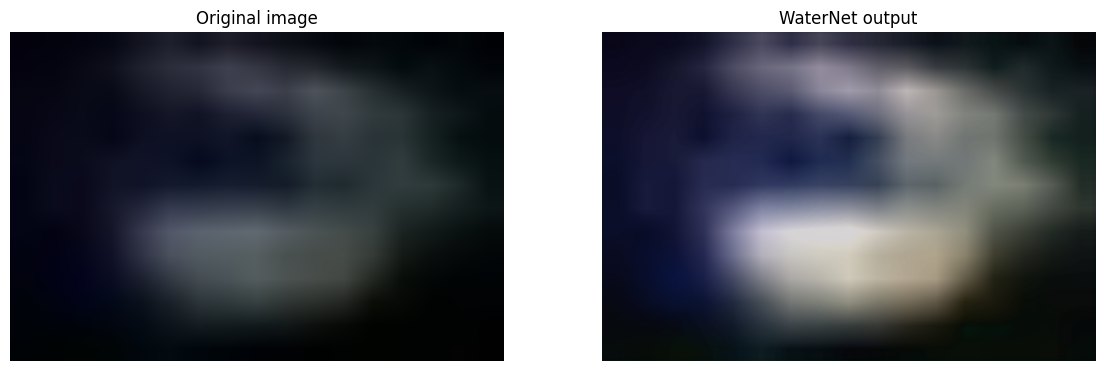

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")

plt.show()

In [ ]:
# Print PSNR, MSE, and SSIM values
print("PSNR:", psnr_value)
print("MSE:", mse_value)
print("SSIM:", ssim_value)

PSNR: 27.745452440410613
MSE: 109.27859857253087
SSIM: 0.659453665226358
